In [1]:
import pandas
import matplotlib.pyplot as plt
import requests
import seaborn as sns

In [2]:
#check that the df loads properly
df = pandas.read_csv('athlete_events.csv')
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
min_year = df['Year'].min()
max_year = df['Year'].max()

print(f"The earliest year in the data is {min_year}.")
print(f"The latest year in the data is {max_year}.")


The earliest year in the data is 1896.
The latest year in the data is 2016.


In [51]:
# Count the number of unique countries represented in the dataset
number_of_countries = df['NOC'].value_counts()
number_of_countries

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

In [5]:
#Filter it to GB
gb_df = df[df['NOC']=='GBR']
gb_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
785,453,Leslie Ablett,M,24.0,NaN,NaN,Great Britain,GBR,1928 Summer,1928,Summer,Amsterdam,Water Polo,Water Polo Men's Water Polo,NaN
786,453,Leslie Ablett,M,32.0,NaN,NaN,Great Britain,GBR,1936 Summer,1936,Summer,Berlin,Water Polo,Water Polo Men's Water Polo,NaN
888,509,Gary Abraham,M,17.0,175.0,64.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 100 metres Backstroke,NaN


In [6]:
#Filter DF to 1988- 1992 and 2000- 2004
gb_all = gb_df[((gb_df['Year'] >= 1988) & (gb_df['Year'] <= 1992))| 
               
               ((gb_df['Year'] >= 2000) & (gb_df['Year'] <= 2006))]
gb_all.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1200,675,"Onochie Lawrence ""Larry"" Achike",M,25.0,188.0,75.0,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Triple Jump,NaN
1240,700,"Nathaniel Leedom ""Nate"" Ackerman",M,26.0,173.0,74.0,Great Britain,GBR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN
1360,770,Marcus Adam,M,24.0,182.0,82.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 100 metres,NaN


In [7]:
gb_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 1200 to 270011
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2068 non-null   int64  
 1   Name    2068 non-null   object 
 2   Sex     2068 non-null   object 
 3   Age     2066 non-null   float64
 4   Height  2053 non-null   float64
 5   Weight  2046 non-null   float64
 6   Team    2068 non-null   object 
 7   NOC     2068 non-null   object 
 8   Games   2068 non-null   object 
 9   Year    2068 non-null   int64  
 10  Season  2068 non-null   object 
 11  City    2068 non-null   object 
 12  Sport   2068 non-null   object 
 13  Event   2068 non-null   object 
 14  Medal   222 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 258.5+ KB


In [52]:
# Capitalize the first and last names in the 'Name' column
gb_all.loc[:, 'Name'] = gb_all['Name'].str.title()
gb_all


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1200,675,"Onochie Lawrence ""Larry"" Achike",M,25.0,188.0,75.0,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Triple Jump,NaN
1240,700,"Nathaniel Leedom ""Nate"" Ackerman",M,26.0,173.0,74.0,Great Britain,GBR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Middleweight, Freestyle",NaN
1360,770,Marcus Adam,M,24.0,182.0,82.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 100 metres,NaN
1361,770,Marcus Adam,M,24.0,182.0,82.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 200 metres,NaN
1362,770,Marcus Adam,M,24.0,182.0,82.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266740,133442,"Thomas Lister ""Tommy"" Yule",M,24.0,182.0,92.0,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Heavyweight,NaN
267227,133697,Amin Zahir,M,21.0,183.0,70.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",NaN
268071,134110,"Kirkham ""Kirk"" Zavieh",M,24.0,186.0,76.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Individual",NaN
268072,134110,"Kirkham ""Kirk"" Zavieh",M,24.0,186.0,76.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",NaN


In [53]:
# Replace missing values with the mean
gb_all['Age'].fillna(gb_all['Age'].mean())
gb_all['Height'].fillna(gb_all['Height'].mean())
gb_all['Weight'].fillna(gb_all['Weight'].mean())


1200      75.0
1240      74.0
1360      82.0
1361      82.0
1362      82.0
          ... 
266740    92.0
267227    70.0
268071    76.0
268072    76.0
270011    72.0
Name: Weight, Length: 2068, dtype: float64

In [54]:
# Ensure that 'Age', 'Height', and 'Weight' are correctly identified as numeric types (float64)

gb_all.loc[:, 'Age'] = gb_all['Age'].astype(float, errors='ignore')
gb_all.loc[:, 'Height'] = gb_all['Height'].astype(float, errors='ignore')
gb_all.loc[:, 'Weight'] = gb_all['Weight'].astype(float, errors='ignore')

# Confirm the data types of the columns
data_types = gb_all[['Age', 'Height', 'Weight']].dtypes
print(data_types)

Age       float64
Height    float64
Weight    float64
dtype: object


In [11]:
#How are team medals counted?
summer_1988 = gb_all[gb_all['Games'] == '1988 Summer']

hockey_1988 = summer_1988['Event'].value_counts()
hockey_1988

Event
Hockey Women's Hockey                         16
Hockey Men's Hockey                           16
Rowing Men's Coxed Eights                      9
Swimming Men's 4 x 100 metres Medley Relay     6
Fencing Women's Foil, Team                     5
                                              ..
Weightlifting Men's Super-Heavyweight          1
Wrestling Men's Welterweight, Freestyle        1
Canoeing Men's Kayak Singles, 500 metres       1
Judo Men's Middleweight                        1
Boxing Men's Light-Middleweight                1
Name: count, Length: 191, dtype: int64

In [12]:
#Need to delete duplicate team medals

#Filter DF to include only rows with medals
correct_medals = gb_all[gb_all['Medal'].notnull()]

# Drop duplicates based on 'Event', 'Games', and 'Medal' columns
unique_medals = correct_medals.drop_duplicates(subset=['Event', 'Games', 'Medal'])

#Team medals will only be counted once.
total_medals = unique_medals['Medal'].value_counts()
total_medals

Medal
Bronze    41
Silver    33
Gold      31
Name: count, dtype: int64

In [13]:
#Filter the DataFrame for the 1988 Summer Olympics
summer_1988_medals = unique_medals[unique_medals['Games'] == '1988 Summer']

#Filter the medals for 1988 Summer
medal_counts_1988_summer = summer_1988_medals['Medal'].value_counts()

#Count medals
medal_counts_1988_summer


Medal
Silver    10
Bronze     9
Gold       5
Name: count, dtype: int64

In [14]:
#Filter the DataFrame for the 1988 Winter Olympics
winter_1988_medals = unique_medals[unique_medals['Games'] == '1988 Winter']

#Filter the medals for 1988 Winter
medal_counts_1988_winter = winter_1988_medals['Medal'].value_counts()

#Count medals
medal_counts_1988_winter

Series([], Name: count, dtype: int64)

In [15]:
#Filter the DataFrame for the 1992 Summer Olympics
summer_1992_medals = unique_medals[unique_medals['Games'] == '1992 Summer']

#Filter the medals for 1992 Summer
medal_counts_1992_summer = summer_1992_medals['Medal'].value_counts()

#Count medals
medal_counts_1992_summer

Medal
Bronze    12
Gold       5
Silver     3
Name: count, dtype: int64

In [16]:
#Filter the DataFrame for the 1992 Winter Olympics
winter_1992_medals = unique_medals[unique_medals['Games'] == '1992 Winter']

#Filter the medals for 1992 Winter
medal_counts_1992_winter = winter_1992_medals['Medal'].value_counts()

#Count medals
medal_counts_1992_winter

Series([], Name: count, dtype: int64)

In [17]:
#Filter the DataFrame for the 2000 Summer Olympics
summer_2000_medals = unique_medals[unique_medals['Games'] == '2000 Summer']

#Filter the medals for 2000 Summer
medal_counts_2000_summer = summer_2000_medals['Medal'].value_counts()

#Count medals
medal_counts_2000_summer

Medal
Gold      11
Silver    10
Bronze     7
Name: count, dtype: int64

In [18]:
#Filter the DataFrame for the 2002 Winter Olympics
winter_2002_medals = unique_medals[unique_medals['Games'] == '2002 Winter']

#Filter the medals for 2002 Winter
medal_counts_2002_winter = winter_2002_medals['Medal'].value_counts()

#Count medals
medal_counts_2002_winter

Medal
Bronze    1
Gold      1
Name: count, dtype: int64

In [19]:
#Filter the DataFrame for the 2004 Summer Olympics
summer_2004_medals = unique_medals[unique_medals['Games'] == '2004 Summer']

#Filter the medals for 2004 Summer
medal_counts_2004_summer = summer_2004_medals['Medal'].value_counts()

#Count medals
medal_counts_2004_summer

Medal
Bronze    12
Gold       9
Silver     9
Name: count, dtype: int64

In [20]:
#Filter the DataFrame for the 2006 Winter Olympics
winter_2006_medals = unique_medals[unique_medals['Games'] == '2006 Winter']

#Filter the medals for 2006 Winter
medal_counts_2006_winter = winter_2006_medals['Medal'].value_counts()

#Count medals
medal_counts_2006_winter

Medal
Silver    1
Name: count, dtype: int64

In [21]:
#Replace with No medal
gb_all['Medal'].fillna('No medal')

1200      No medal
1240      No medal
1360      No medal
1361      No medal
1362      No medal
            ...   
266740    No medal
267227    No medal
268071    No medal
268072    No medal
270011    No medal
Name: Medal, Length: 2068, dtype: object

In [22]:
gb_all['Medal'].value_counts()

Medal
Bronze    82
Gold      74
Silver    66
Name: count, dtype: int64

In [23]:
# How many games are being analysed? 
sum_win = gb_all[['Year', 'Season']].drop_duplicates().sort_values(by='Year')
sum_win


,Year,Season
9386,1988,Winter
1492,1988,Summer
1360,1992,Summer
9388,1992,Winter
1200,2000,Summer
1363,2002,Winter
1240,2004,Summer
4208,2006,Winter


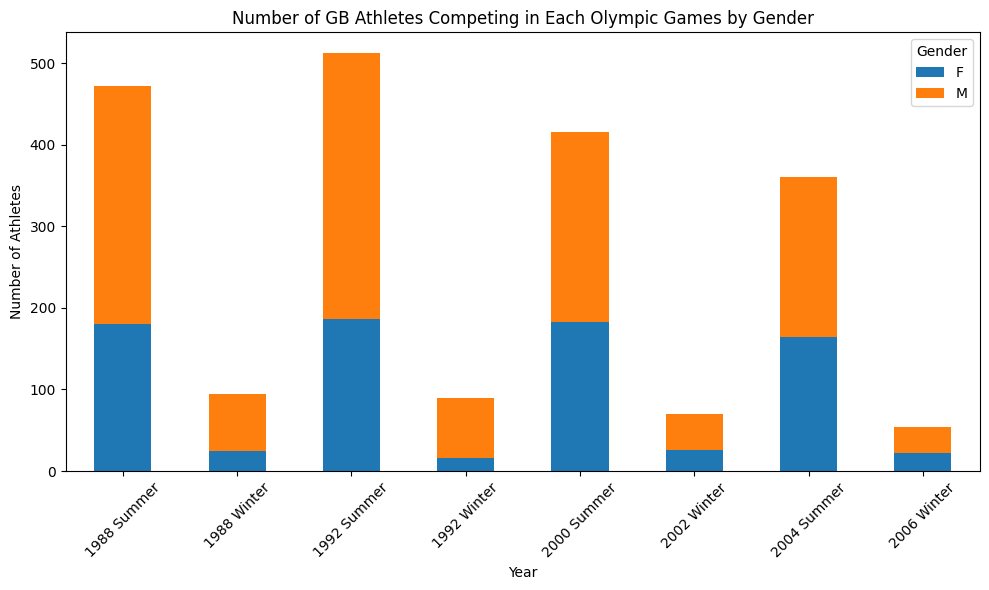

In [24]:
# Group the data by 'Year' and 'Sex', and count the number of athletes
athletes_per_game = gb_all.groupby(['Games', 'Sex']).size().unstack()

# Plot the data
athletes_per_game.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Number of GB Athletes Competing in Each Olympic Games by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show the plot
plt.tight_layout()
plt.show()


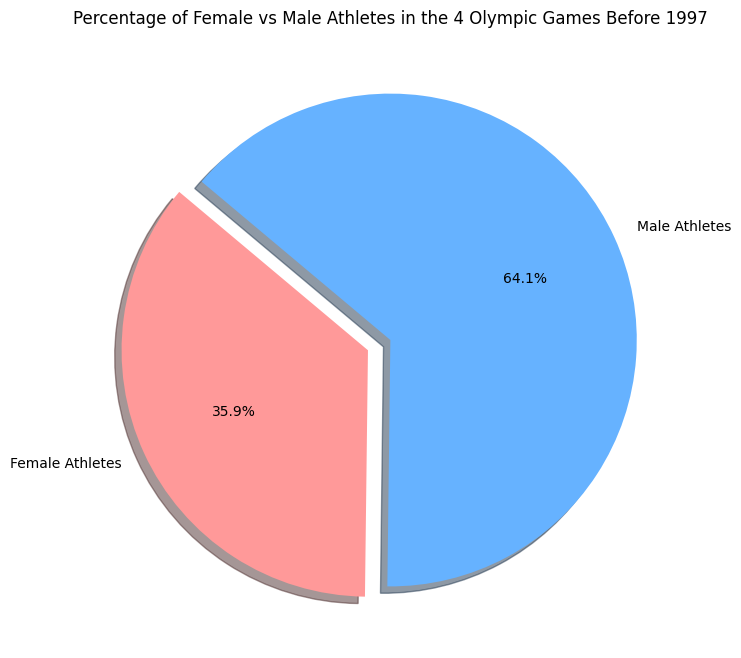

In [55]:
# Calculate the total number of female athletes in each of the 4 Olympic Games before 1997
total_female_1988_summer = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '1988 Summer')]['ID'].nunique()
total_female_1988_winter = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '1988 Winter')]['ID'].nunique()
total_female_1992_summer = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '1992 Summer')]['ID'].nunique()
total_female_1992_winter = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '1992 Winter')]['ID'].nunique()

# Calculate the total number of male athletes in each of the 4 Olympic Games before 1997
total_male_1988_summer = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '1988 Summer')]['ID'].nunique()
total_male_1988_winter = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '1988 Winter')]['ID'].nunique()
total_male_1992_summer = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '1992 Summer')]['ID'].nunique()
total_male_1992_winter = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '1992 Winter')]['ID'].nunique()

# Combine the totals
total_female_pre_1997 = total_female_1988_summer + total_female_1988_winter + total_female_1992_summer + total_female_1992_winter
total_male_pre_1997 = total_male_1988_summer + total_male_1988_winter + total_male_1992_summer + total_male_1992_winter

# Calculate the combined total
total_pre_1997 = total_female_pre_1997 + total_male_pre_1997

# Calculate the percentage of female and male athletes
percentage_female_pre_1997 = (total_female_pre_1997 / total_pre_1997) * 100
percentage_male_pre_1997 = (total_male_pre_1997 / total_pre_1997) * 100

# Create a pie chart
labels = ['Female Athletes', 'Male Athletes']
sizes = [percentage_female_pre_1997, percentage_male_pre_1997]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)  # explode the first slice (female athletes)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Female vs Male Athletes in the 4 Olympic Games Before 1997')
plt.show()


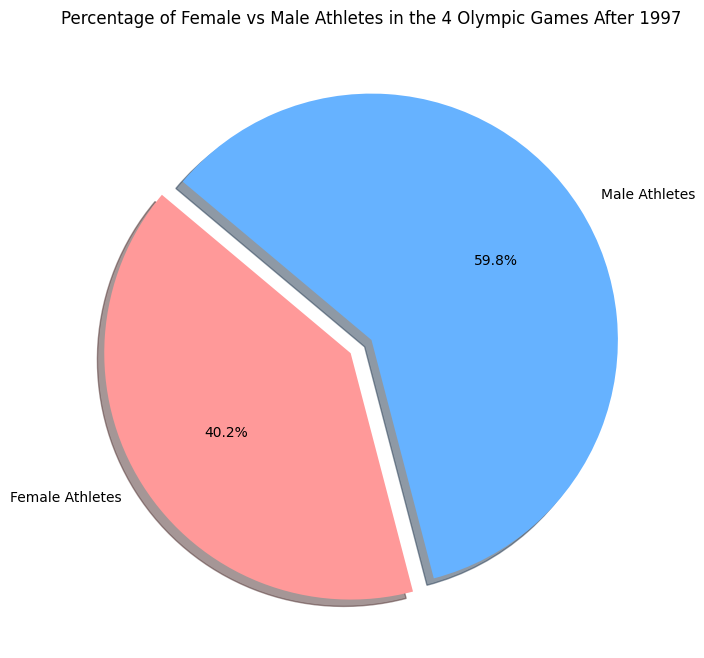

In [57]:
# Calculate the total number of female athletes in each of the 4 Olympic Games after 1997
total_female_2000_summer = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '2000 Summer')]['ID'].nunique()
total_female_2002_winter = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '2002 Winter')]['ID'].nunique()
total_female_2004_summer = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '2004 Summer')]['ID'].nunique()
total_female_2006_winter = gb_all[(gb_all['Sex'] == 'F') & (gb_all['Games'] == '2006 Winter')]['ID'].nunique()

# Calculate the total number of male athletes in each of the 4 Olympic Games after 1997
total_male_2000_summer = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '2000 Summer')]['ID'].nunique()
total_male_2002_winter = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '2002 Winter')]['ID'].nunique()
total_male_2004_summer = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '2004 Summer')]['ID'].nunique()
total_male_2006_winter = gb_all[(gb_all['Sex'] == 'M') & (gb_all['Games'] == '2006 Winter')]['ID'].nunique()

# Combine the totals
total_female_post_1997 = total_female_2000_summer + total_female_2002_winter + total_female_2004_summer + total_female_2006_winter
total_male_post_1997 = total_male_2000_summer + total_male_2002_winter + total_male_2004_summer + total_male_2006_winter

# Calculate the combined total
total_post_1997 = total_female_post_1997 + total_male_post_1997

# Calculate the percentage of female and male athletes
percentage_female_post_1997 = (total_female_post_1997 / total_post_1997) * 100
percentage_male_post_1997 = (total_male_post_1997 / total_post_1997) * 100

# Create a pie chart
labels = ['Female Athletes', 'Male Athletes']
sizes = [percentage_female_post_1997, percentage_male_post_1997]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)  # explode the first slice (female athletes)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Female vs Male Athletes in the 4 Olympic Games After 1997')
plt.show()


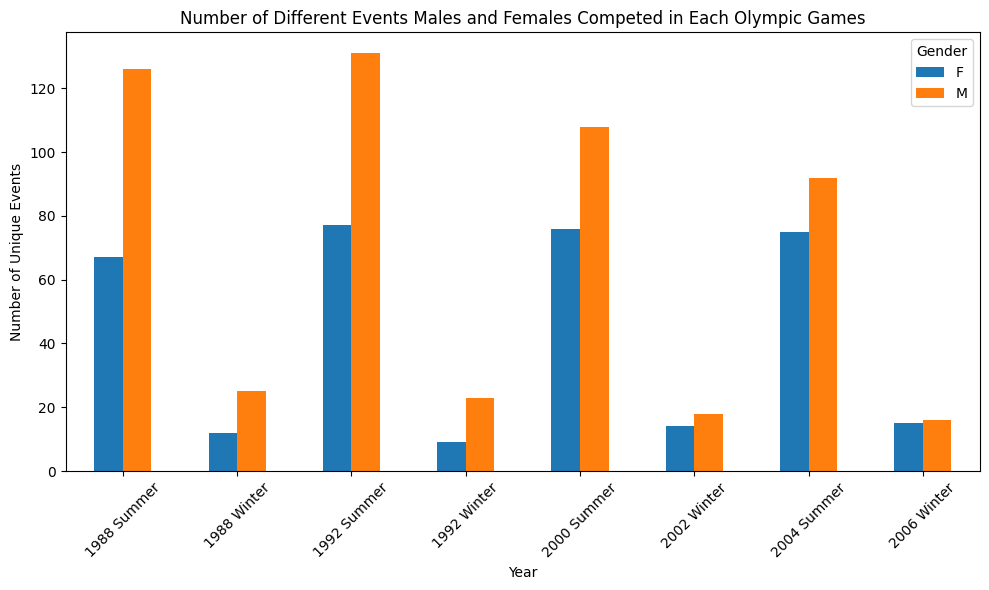

In [25]:
# Grouping the data by 'Games', 'Sex', and 'Event' to count the number of unique events for males and females
events_per_game_gender = gb_all.groupby(['Games', 'Sex'])['Event'].nunique().unstack()

# Plotting the data
events_per_game_gender.plot(kind='bar', figsize=(10, 6))

# Adding labels and title
plt.title('Number of Different Events Males and Females Competed in Each Olympic Games')
plt.xlabel('Year')
plt.ylabel('Number of Unique Events')
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

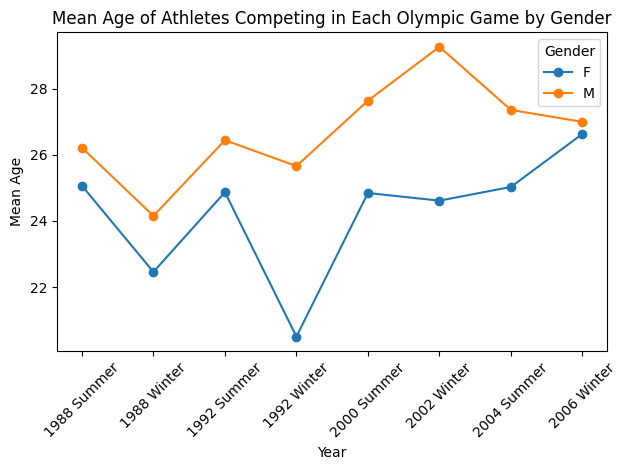

In [26]:
# Grouping the data by 'Games' and 'Sex' to calculate the mean age for male and female athletes
mean_age_per_game = gb_all.groupby(['Games', 'Sex'])['Age'].mean().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
mean_age_per_game.plot(kind='line', marker='o')

# Adding labels and title
plt.title('Mean Age of Athletes Competing in Each Olympic Game by Gender')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show the plot
plt.tight_layout()
plt.show()


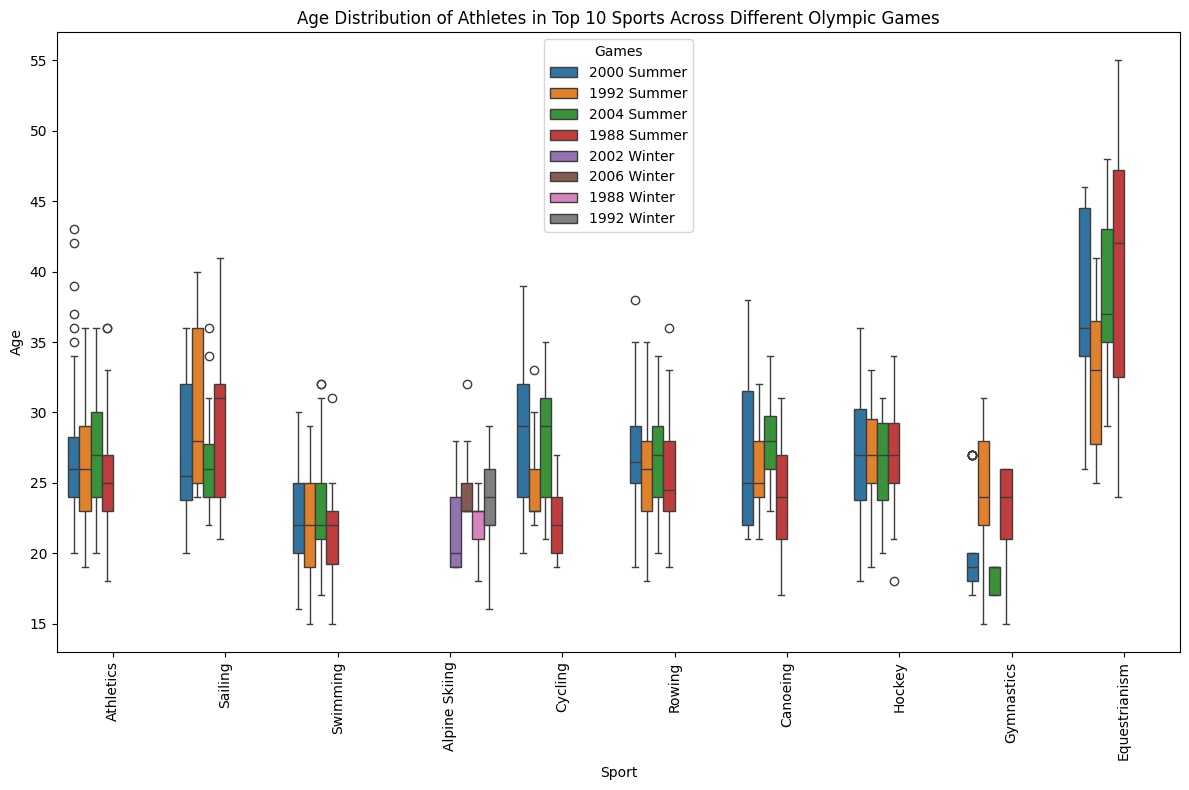

In [27]:
# Identifying the top 10 sports by number of athletes competing
top_10_sports = gb_all['Sport'].value_counts().head(10).index

# Filtering the dataframe to only include the top 10 sports
top_sports_df = gb_all[gb_all['Sport'].isin(top_10_sports)]

# Plotting the age distribution of athletes for the top 10 sports
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_sports_df, x='Sport', y='Age', hue='Games')

# Rotating x-axis labels for readability
plt.xticks(rotation=90)

# Adding labels and title
plt.title('Age Distribution of Athletes in Top 10 Sports Across Different Olympic Games')
plt.xlabel('Sport')
plt.ylabel('Age')

# Displaying the plot
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

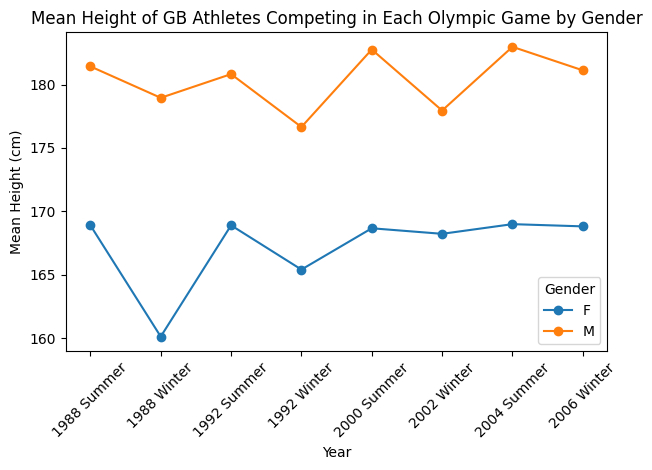

In [28]:
# Grouping the data by 'Year' and 'Sex' to calculate the mean height for male and female athletes
mean_age_per_game = gb_all.groupby(['Games', 'Sex'])['Height'].mean().unstack()

# Plotting the data
plt.figure(figsize=(10, 6))
mean_age_per_game.plot(kind='line', marker='o')

# Adding labels and title
plt.title('Mean Height of GB Athletes Competing in Each Olympic Game by Gender')
plt.xlabel('Year')
plt.ylabel('Mean Height (cm)')
plt.xticks(rotation=45)
plt.legend(title="Gender")

# Show the plot
plt.tight_layout()
plt.show()


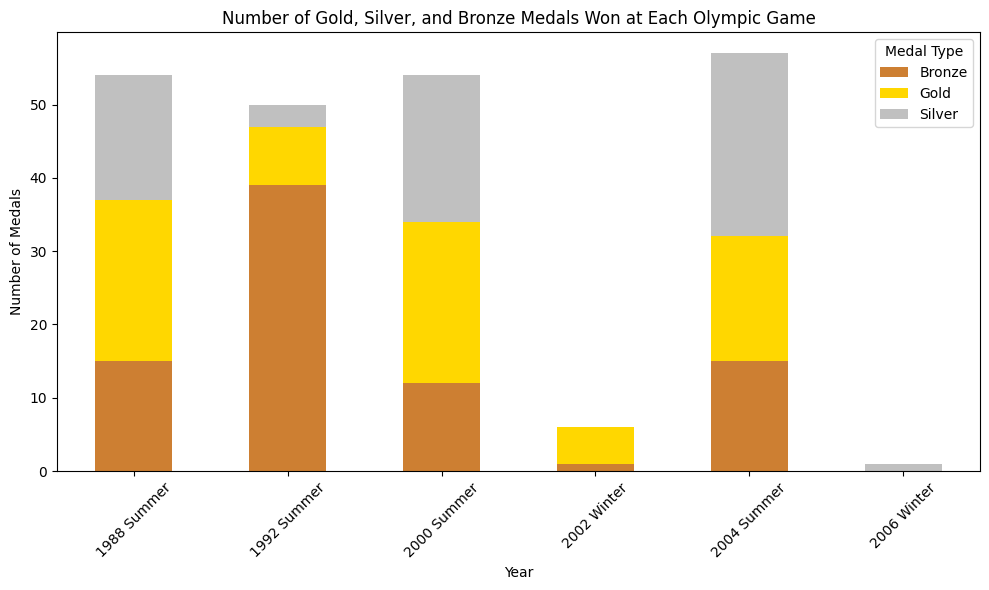

In [29]:
# Grouping the data by 'Year' and 'Medal' to count the number of medals won
medals_per_game = gb_all.groupby(['Games', 'Medal']).size().unstack().fillna(0)

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Plotting the data
medals_per_game.plot(kind='bar', stacked=True, figsize=(10, 6),color=[colors.get(col, '#333333') for col in medals_per_game.columns])

# Adding labels and title
plt.title('Number of Gold, Silver, and Bronze Medals Won at Each Olympic Game')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title="Medal Type")

# Show the plot
plt.tight_layout()
plt.show()


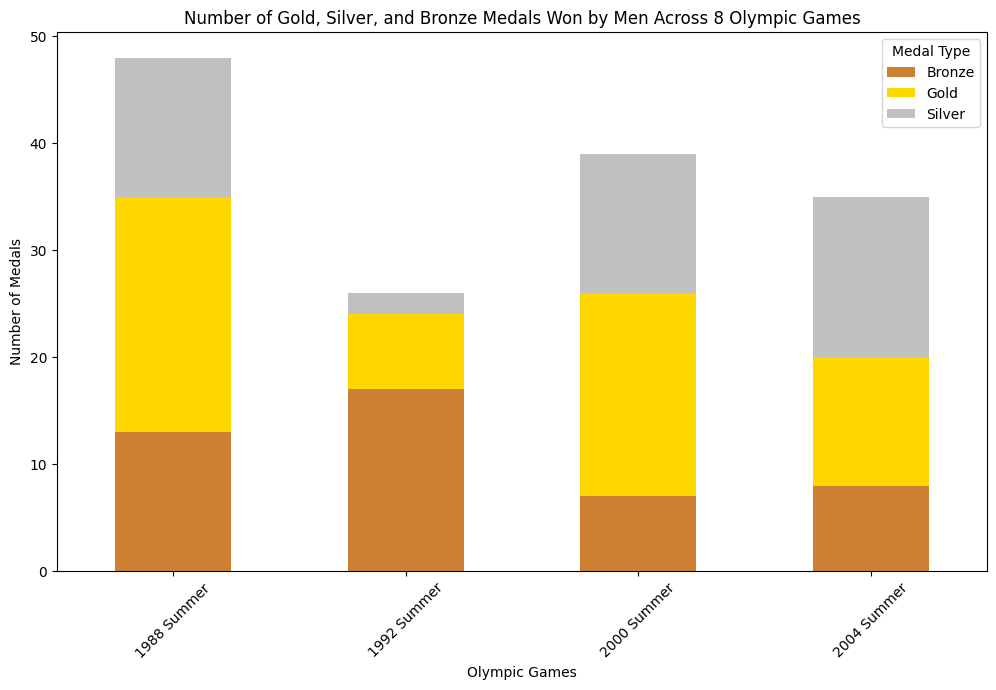

In [30]:
# Filter the dataframe to include only rows with medals
medal_df = gb_all[gb_all['Medal'].notnull()]

# Filter the dataframe to include only rows with men
medals_by_gender_men = gb_all[gb_all['Sex'] == 'M']

# Group by 'Games' and 'Medal', then count the number of each type of medal
medals_by_gender_men = medals_by_gender_men.groupby(['Games', 'Medal']).size().unstack().fillna(0)

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Plot for men
medals_by_gender_men.plot(kind='bar', stacked=True, figsize=(12, 7), color=[colors.get(col, '#333333') for col in medals_by_gender_men.columns])
plt.title('Number of Gold, Silver, and Bronze Medals Won by Men Across 8 Olympic Games')
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.show()

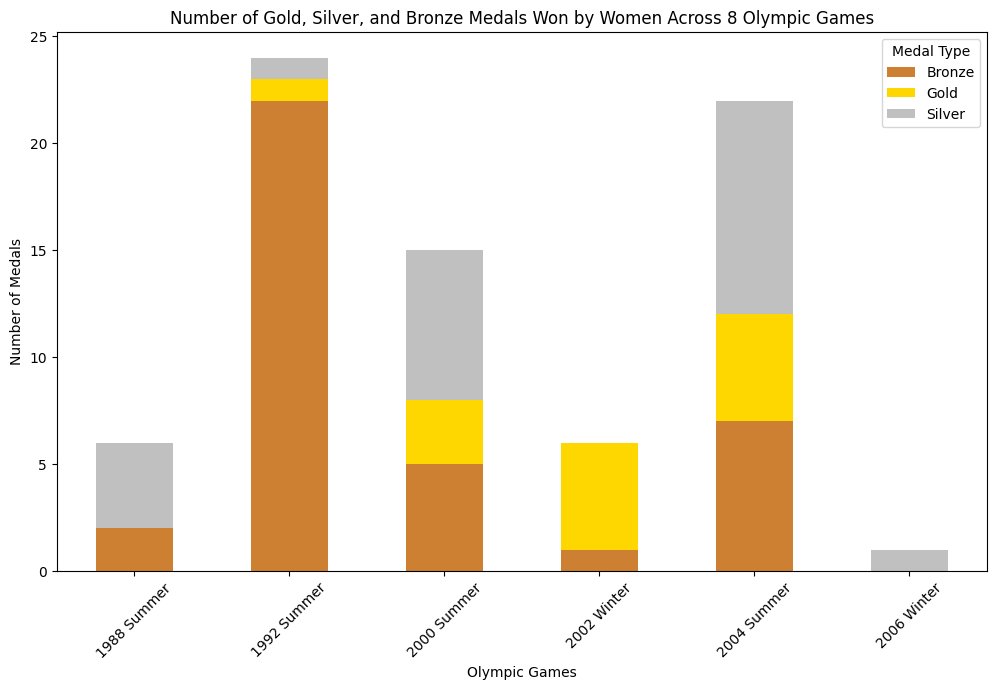

In [31]:
# Filter the dataframe to include only rows with medals
medal_df = gb_all[gb_all['Medal'].notnull()]

# Filter the dataframe to include only rows with women
medals_by_gender_women = gb_all[gb_all['Sex'] == 'F']

# Group by 'Games' and 'Medal', then count the number of each type of medal
medals_by_gender_women = medals_by_gender_women.groupby(['Games', 'Medal']).size().unstack().fillna(0)

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Plot for women
medals_by_gender_women.plot(kind='bar', stacked=True, figsize=(12, 7), color=[colors.get(col, '#333333') for col in medals_by_gender_women.columns])
plt.title('Number of Gold, Silver, and Bronze Medals Won by Women Across 8 Olympic Games')
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')
plt.show()

In [32]:
#Filter DF pre 1997
pre_97 = gb_all[((gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992))]
pre_97.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, 1360 to 268072
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1169 non-null   int64  
 1   Name    1169 non-null   object 
 2   Sex     1169 non-null   object 
 3   Age     1169 non-null   float64
 4   Height  1169 non-null   float64
 5   Weight  1169 non-null   float64
 6   Team    1169 non-null   object 
 7   NOC     1169 non-null   object 
 8   Games   1169 non-null   object 
 9   Year    1169 non-null   int64  
 10  Season  1169 non-null   object 
 11  City    1169 non-null   object 
 12  Sport   1169 non-null   object 
 13  Event   1169 non-null   object 
 14  Medal   104 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 146.1+ KB


In [33]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]

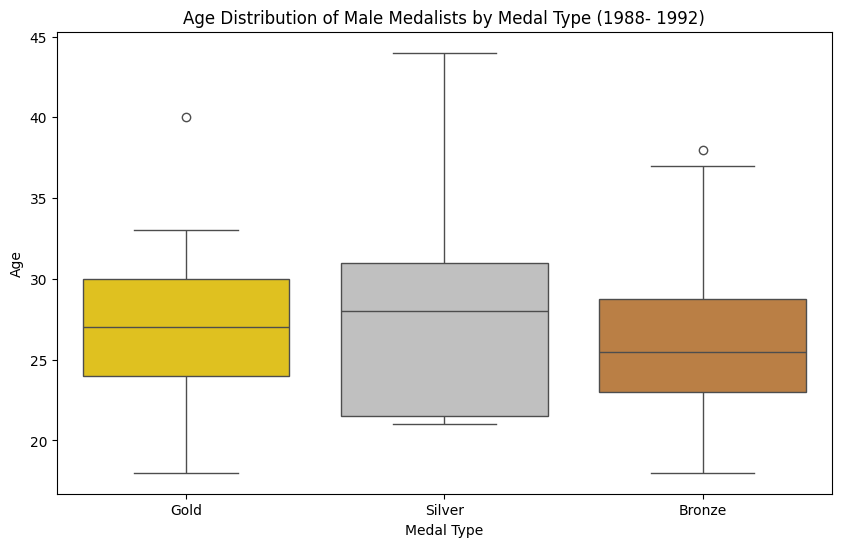

In [34]:
#Filter DF pre 1997
pre_97 = gb_all[((gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992))]

# Filter the dataframe to include only rows with medals
medal_df = pre_97[pre_97['Medal'].notnull()]

# Filter the dataframe to include only male athletes with medals
male_medalists_age = medal_df [medal_df['Sex'] == 'M']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', data=male_medalists_age, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Age Distribution of Male Medalists by Medal Type (1988- 1992)')
plt.xlabel('Medal Type')
plt.ylabel('Age')

# Display the plot
plt.show()


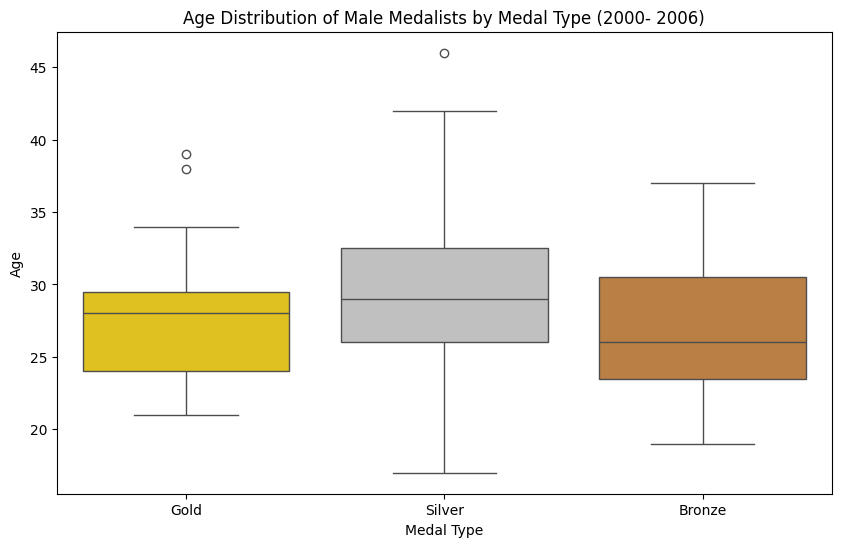

In [35]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]

# Filter the dataframe to include only rows with medals
medal_df = post_97[post_97['Medal'].notnull()]

# Filter the dataframe to include only male athletes with medals
male_medalists_age = medal_df [medal_df['Sex'] == 'M']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', data=male_medalists_age, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Age Distribution of Male Medalists by Medal Type (2000- 2006)')
plt.xlabel('Medal Type')
plt.ylabel('Age')

# Display the plot
plt.show()


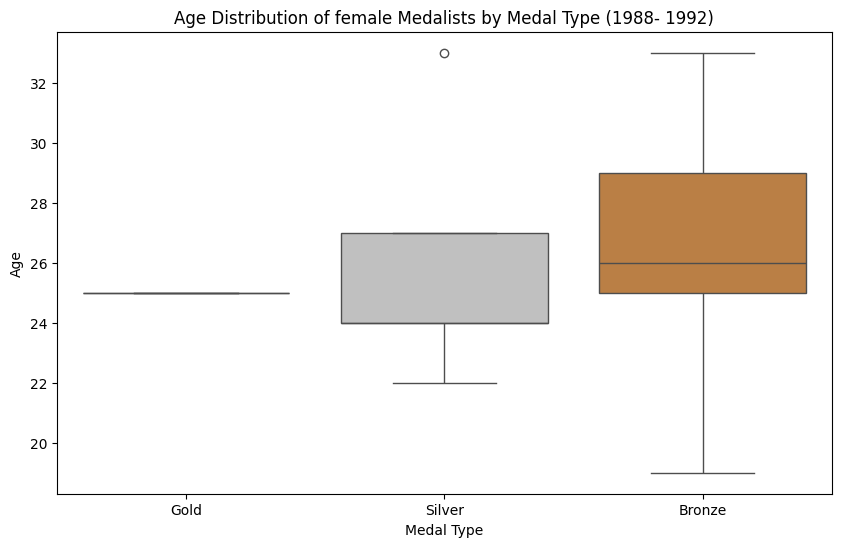

In [36]:
#Filter DF pre 1997
pre_97 = gb_all[((gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992))]

# Filter the dataframe to include only rows with medals
medal_df = pre_97[pre_97['Medal'].notnull()]

# Filter the dataframe to include only female athletes with medals
female_medalists_age = medal_df [medal_df['Sex'] == 'F']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', data=female_medalists_age, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Age Distribution of female Medalists by Medal Type (1988- 1992)')
plt.xlabel('Medal Type')
plt.ylabel('Age')

# Display the plot
plt.show()

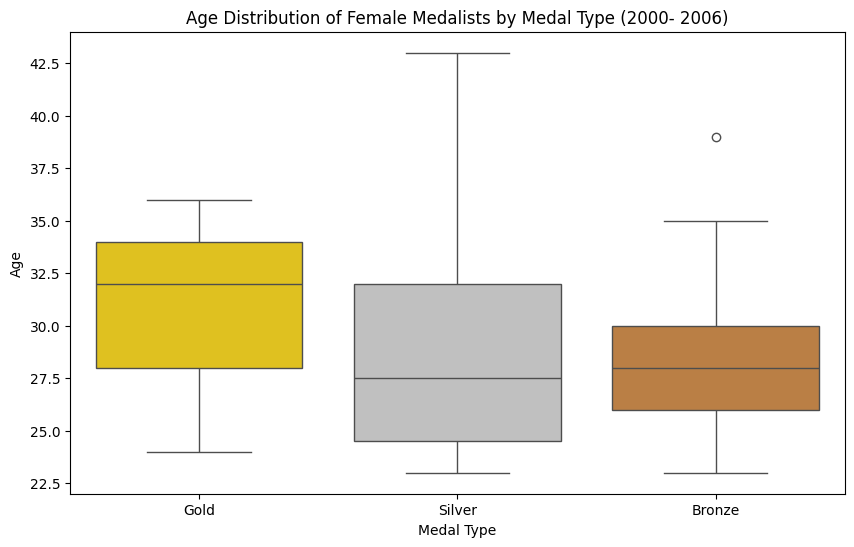

In [59]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]

# Filter the dataframe to include only rows with medals
medal_df = post_97[post_97['Medal'].notnull()]

# Filter the dataframe to include only female athletes with medals
female_medalists_age = medal_df [medal_df['Sex'] == 'F']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', data=female_medalists_age, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette= colors)

# Adding title and labels
plt.title('Age Distribution of Female Medalists by Medal Type (2000- 2006)')
plt.xlabel('Medal Type')
plt.ylabel('Age')

# Display the plot
plt.show()

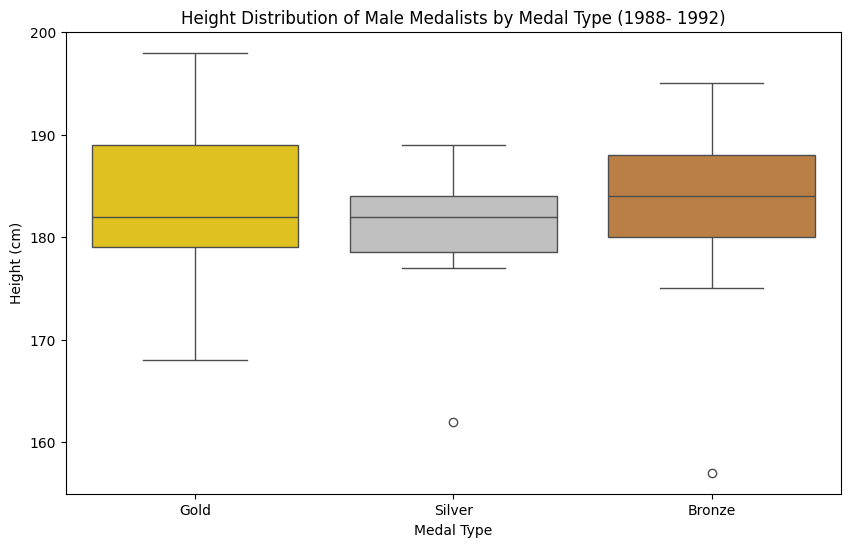

In [38]:
#Filter DF pre 1997
pre_97 = gb_all[((gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992))]

# Filter the dataframe to include only rows with medals
medal_df = pre_97[pre_97['Medal'].notnull()]

# Filter the dataframe to include only male athletes with medals
male_medalists_height = medal_df [medal_df['Sex'] == 'M']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Height', data=male_medalists_height, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Height Distribution of Male Medalists by Medal Type (1988- 1992)')
plt.xlabel('Medal Type')
plt.ylabel('Height (cm)')

# Display the plot
plt.show()


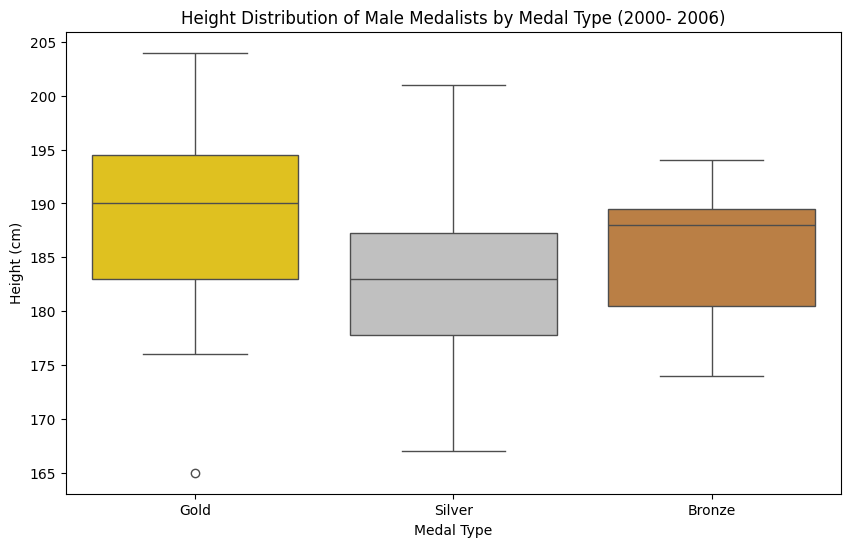

In [39]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]

# Filter the dataframe to include only rows with medals
medal_df = post_97[post_97['Medal'].notnull()]

# Filter the dataframe to include only male athletes with medals
male_medalists_height = medal_df [medal_df['Sex'] == 'M']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Height', data=male_medalists_height, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Height Distribution of Male Medalists by Medal Type (2000- 2006)')
plt.xlabel('Medal Type')
plt.ylabel('Height (cm)')

# Display the plot
plt.show()


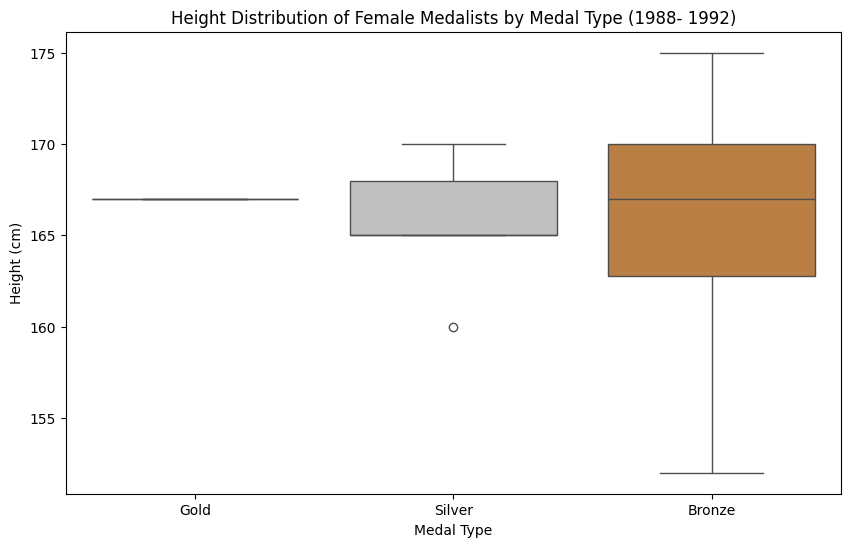

In [40]:
#Filter DF pre 1997
pre_97 = gb_all[((gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992))]

# Filter the dataframe to include only rows with medals
medal_df = pre_97[pre_97['Medal'].notnull()]

# Filter the dataframe to include only female athletes with medals
female_medalists_height = medal_df [medal_df['Sex'] == 'F']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Height', data=female_medalists_height, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Height Distribution of Female Medalists by Medal Type (1988- 1992)')
plt.xlabel('Medal Type')
plt.ylabel('Height (cm)')

# Display the plot
plt.show()


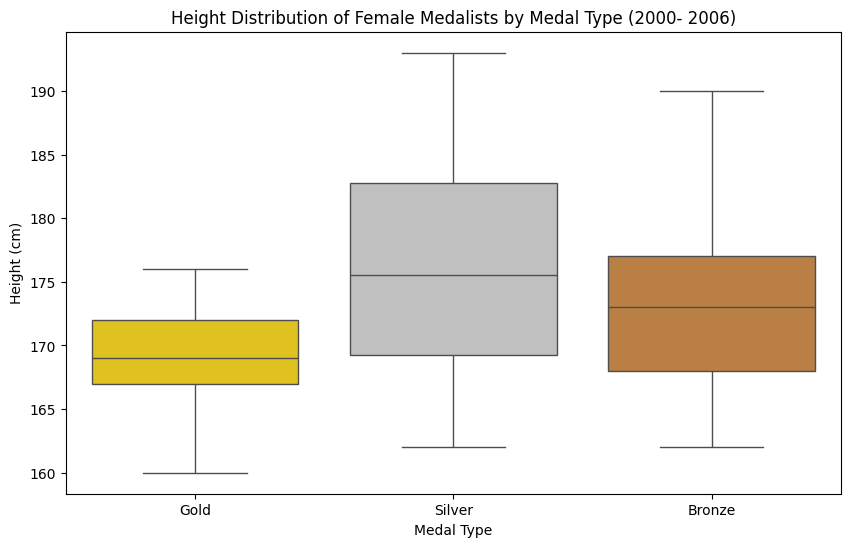

In [41]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]

# Filter the dataframe to include only rows with medals
medal_df = post_97[post_97['Medal'].notnull()]

# Filter the dataframe to include only female athletes with medals
female_medalists_height = medal_df [medal_df['Sex'] == 'F']

# Define the color scheme for the medals
colors = {
    'Gold': '#FFD700',  # Gold color
    'Silver': '#C0C0C0',  # Silver color
    'Bronze': '#CD7F32'  # Bronze color
}

# Create a boxplot to show the distribution of ages for each medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Height', data=female_medalists_height, hue='Medal', order=['Gold', 'Silver', 'Bronze'], palette=colors)

# Adding title and labels
plt.title('Height Distribution of Female Medalists by Medal Type (2000- 2006)')
plt.xlabel('Medal Type')
plt.ylabel('Height (cm)')

# Display the plot
plt.show()


In [42]:
#how many NaN out of 1169
pre_97['Medal'].isna().sum()

np.int64(1065)

In [43]:
#Filter DF post 1997
post_97 = gb_all[((gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006))]
post_97.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 1200 to 270011
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      899 non-null    int64  
 1   Name    899 non-null    object 
 2   Sex     899 non-null    object 
 3   Age     899 non-null    float64
 4   Height  899 non-null    float64
 5   Weight  899 non-null    float64
 6   Team    899 non-null    object 
 7   NOC     899 non-null    object 
 8   Games   899 non-null    object 
 9   Year    899 non-null    int64  
 10  Season  899 non-null    object 
 11  City    899 non-null    object 
 12  Sport   899 non-null    object 
 13  Event   899 non-null    object 
 14  Medal   118 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 112.4+ KB


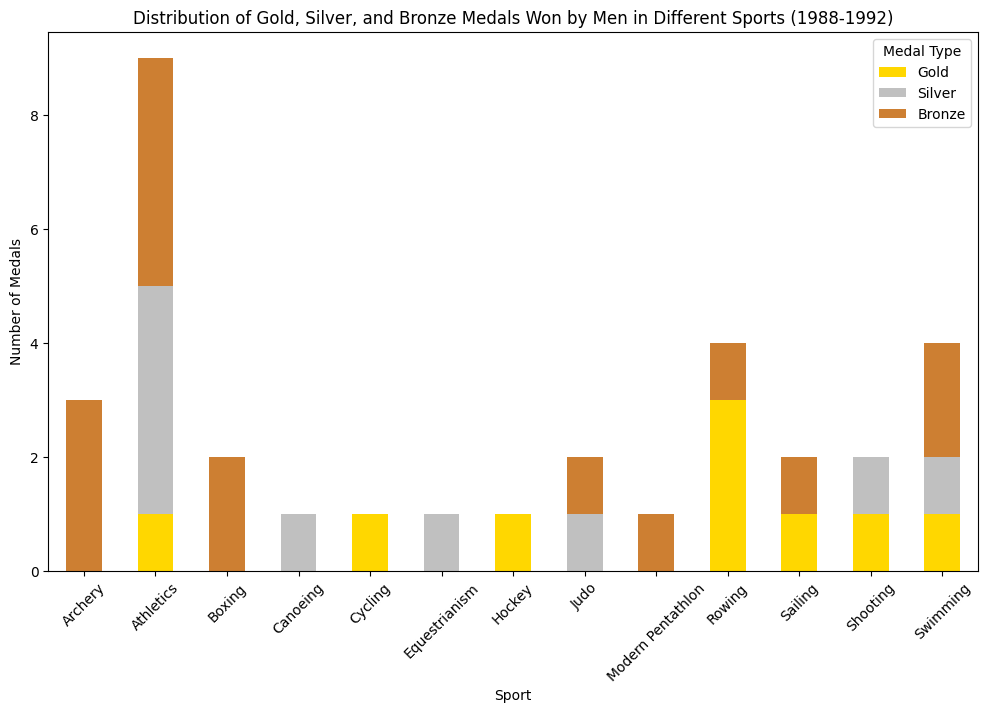

In [44]:
# Filter DF pre 1997
pre_97 = gb_all[(gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992)]

# Filter DF to include only rows with medals
correct_medals = pre_97[pre_97['Medal'].notnull()]

# Drop duplicates to count the correct number of medals not team medals
unique_medals = correct_medals.drop_duplicates(subset=['Event', 'Games', 'Medal'])

# Filter to only show males
unique_males = unique_medals[unique_medals['Sex'] == 'M']

# Define the color scheme for the medals
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

# Group by 'Sport' and 'Medal' to count the number of each type of medal won by women
male_sport_medals = unique_males.groupby(['Sport', 'Medal']).size().unstack().fillna(0)

# Ensure the columns are in the correct order
male_sport_medals = male_sport_medals[['Gold', 'Silver', 'Bronze']]

# Plot a stacked bar chart to show the distribution of gold, silver, and bronze medals by sport
male_sport_medals.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

# Adding title and labels
plt.title('Distribution of Gold, Silver, and Bronze Medals Won by Men in Different Sports (1988-1992)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')

# Display the plot
plt.show()


In [45]:
# Filter DF post 1997
post_97 = gb_all[(gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006)]

# Filter DF to include only rows with medals
correct_medals_post = post_97[post_97['Medal'].notnull()]

# Drop duplicates to count the correct number of medals not team medals
unique_medals_post = correct_medals_post.drop_duplicates(subset=['Event', 'Games', 'Medal'])

# Filter to only show males
unique_males_post = unique_medals_post[unique_medals_post['Sex'] == 'F']

# Define the color scheme for the medals
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

# Group by 'Sport' and 'Medal' to count the number of each type of medal won by men
male_sport_medals_post = unique_males_post.groupby(['Sport', 'Medal']).size().unstack().fillna(0)

# Ensure the columns are in the correct order
male_sport_medals_post = male_sport_medals_post[['Gold', 'Silver', 'Bronze']]

# Plot a stacked bar chart to show the distribution of gold, silver, and bronze medals by sport
female_sport_medals_post.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

# Adding title and labels
plt.title('Distribution of Gold, Silver, and Bronze Medals Won by Men in Different Sports (2000- 2006)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')

# Display the plot
plt.show()

NameError: name 'female_sport_medals_post' is not defined

In [ ]:
# Filter DF pre 1997
pre_97 = gb_all[(gb_all['Year'] >= 1988) & (gb_all['Year'] <= 1992)]

# Filter DF to include only rows with medals
correct_medals = pre_97[pre_97['Medal'].notnull()]

# Drop duplicates to count the correct number of medals not team medals
unique_medals = correct_medals.drop_duplicates(subset=['Event', 'Games', 'Medal'])

# Filter to only show females
unique_females = unique_medals[unique_medals['Sex'] == 'F']

# Define the color scheme for the medals
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

# Group by 'Sport' and 'Medal' to count the number of each type of medal won by women
female_sport_medals = unique_females.groupby(['Sport', 'Medal']).size().unstack().fillna(0)

# Ensure the columns are in the correct order
female_sport_medals = female_sport_medals[['Gold', 'Silver', 'Bronze']]

# Plot a stacked bar chart to show the distribution of gold, silver, and bronze medals by sport
female_sport_medals.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

# Adding title and labels
plt.title('Distribution of Gold, Silver, and Bronze Medals Won by Women in Different Sports (1988-1992)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')

# Display the plot
plt.show()


In [ ]:
# Filter DF post 1997
post_97 = gb_all[(gb_all['Year'] >= 2000) & (gb_all['Year'] <= 2006)]

# Filter DF to include only rows with medals
correct_medals_post = post_97[post_97['Medal'].notnull()]

# Drop duplicates based on 'Event', 'Games', and 'Medal' columns
unique_medals_post = correct_medals_post.drop_duplicates(subset=['Event', 'Games', 'Medal'])

# Filter to only show females
unique_females_post = unique_medals_post[unique_medals_post['Sex'] == 'F']

# Define the color scheme for the medals
colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze

# Group by 'Sport' and 'Medal' to count the number of each type of medal won by women
female_sport_medals_post = unique_females_post.groupby(['Sport', 'Medal']).size().unstack().fillna(0)

# Ensure the columns are in the correct order
female_sport_medals_post = female_sport_medals_post[['Gold', 'Silver', 'Bronze']]

# Plot a stacked bar chart to show the distribution of gold, silver, and bronze medals by sport
female_sport_medals_post.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

# Adding title and labels
plt.title('Distribution of Gold, Silver, and Bronze Medals Won by Women in Different Sports (2000- 2006)')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')

# Display the plot
plt.show()